In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn import tree

In [4]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz, DecisionTreeRegressor

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from matplotlib import pyplot as plt

In [7]:
import seaborn as sns

In [8]:
import graphviz # anaconda prompt- pip install graphviz

In [9]:
import pydotplus # anaconda prompt- pip install pydotplus

In [227]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import io 
from scipy import misc
%matplotlib inline

In [11]:
deco = pd.read_csv('../Project/yeniEco.csv')
deco = deco.drop(['Time Code', 'Series Code', 'Series Name'], axis=1)
deco = deco[deco.Time >= 1980.0]
deco = deco[deco.Time <=2014]
deco['United States [USA]'] = deco['United States [USA]'].astype(np.float64)
cols = deco.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
deco.columns = cols
deco

,Time,United_States_[USA]
20,1980.0,-0.244596
21,1981.0,2.594470
22,1982.0,-1.910891
23,1983.0,4.632457
24,1984.0,7.259087
25,1985.0,4.238738
26,1986.0,3.511614
27,1987.0,3.461748
28,1988.0,4.203972
29,1989.0,3.680524


In [12]:
data = pd.read_csv("../Project/database.csv", low_memory=False)

In [13]:
data.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [14]:
cols = data.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
data.columns = cols

In [15]:
data = data.drop(['Agency_Code', 'Victim_Ethnicity', 'Agency_Name', 'Crime_Type', 'Agency_Type', 'Perpetrator_Ethnicity', 'Victim_Count', 'Perpetrator_Count'], axis=1)
data = data[data.Perpetrator_Age != "0"]
data = data[data.Perpetrator_Age != ""]
data = data[data.Perpetrator_Age != " "]
data = data[data.Victim_Sex != "Unknown"]
data = data[data.Victim_Race != "Unknown"]
data = data[data.Perpetrator_Sex != "Unknown"]
data = data[data.Perpetrator_Race != "Unknown"]
data = data[data.Relationship != "Unknown"]
data = data[data.Weapon != "Unknown"]
data

,Record_ID,City,State,Year,Month,Incident,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Relationship,Weapon,Record_Source
0,1,Anchorage,Alaska,1980,January,1,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,FBI
1,2,Anchorage,Alaska,1980,March,1,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,FBI
3,4,Anchorage,Alaska,1980,April,1,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,FBI
5,6,Anchorage,Alaska,1980,May,1,Yes,Male,30,White,Male,36,White,Acquaintance,Rifle,FBI
6,7,Anchorage,Alaska,1980,May,2,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife,FBI
7,8,Anchorage,Alaska,1980,June,1,Yes,Female,99,White,Male,35,White,Wife,Knife,FBI
11,12,Anchorage,Alaska,1980,July,2,Yes,Male,20,White,Male,49,White,Stranger,Shotgun,FBI
12,13,Anchorage,Alaska,1980,July,3,Yes,Female,36,Black,Male,39,Black,Girlfriend,Blunt Object,FBI
15,16,Anchorage,Alaska,1980,August,3,Yes,Male,31,Black,Female,29,Black,Ex-Husband,Handgun,FBI
17,18,Juneau,Alaska,1980,November,1,Yes,Male,33,Native American/Alaska Native,Male,23,Native American/Alaska Native,Brother,Blunt Object,FBI


In [16]:
data.groupby('Weapon').describe()

Incident                                                    \
                  count       mean        std  min  25%  50%   75%    max   
Weapon                                                                      
Blunt Object    40757.0  12.066835  61.072883  1.0  1.0  1.0   4.0  999.0   
Drowning          908.0   4.796256  11.443515  1.0  1.0  1.0   3.0  116.0   
Drugs            1159.0   8.929249  55.327087  1.0  1.0  1.0   2.0  806.0   
Explosives        332.0   9.397590  10.781196  1.0  2.0  7.0  14.0  121.0   
Fall              146.0   7.650685  17.902260  1.0  1.0  1.0   3.0  131.0   
Fire             3347.0  11.729011  52.353285  1.0  1.0  1.0   5.0  946.0   
Firearm         12078.0  18.357427  84.995879  1.0  1.0  2.0   6.0  986.0   
Gun               746.0   4.130027  12.512779  1.0  1.0  1.0   2.0  140.0   
Handgun        159003.0  10.082936  38.875776  1.0  1.0  2.0   7.0  999.0   
Knife           61223.0  10.458749  45.524563  0.0  1.0  1.0   5.0  999.0   
Poison            322.0  12.673913  66.131436  1.0  1.0  1.0   2.0  778.0   
Rifle           16545.0   5.692959  29.985129  1.0  1.0  1.0   2.0  970.0   
Shotgun         22100.0   6.317149  34.450486  1.0  1.0  1.0   3.0  994.0   
Strangulation    3785.0   5.780185  12.324895  1.0  1.0  1.0   4.0  183.0   
Suffocation      2587.0   4.333204  12.171702  1.0  1.0  1.0   3.0  271.0   

              Record_ID                  ...   Victim_Age             Year  \
                  count           mean   ...          75%    max     count   
Weapon                                   ...                                 
Blunt Object    40757.0  311199.300905   ...        50.00  998.0   40757.0   
Drowning          908.0  282801.124449   ...        20.25  998.0     908.0   
Drugs            1159.0  423884.824849   ...        43.00  998.0    1159.0   
Explosives        332.0  300250.792169   ...        50.00   99.0     332.0   
Fall              146.0  272387.965753   ...        44.75  998.0     146.0   
Fire             3347.0  282784.446669   ...        50.50   99.0    3347.0   
Firearm         12078.0  407479.487581   ...        40.00  998.0   12078.0   
Gun               746.0  394714.222520   ...        42.00  998.0     746.0   
Handgun        159003.0  296403.143733   ...        39.00  998.0  159003.0   
Knife           61223.0  281999.439867   ...        45.00  998.0   61223.0   
Poison            322.0  309633.866460   ...        60.75   99.0     322.0   
Rifle           16545.0  255501.214445   ...        43.00  998.0   16545.0   
Shotgun         22100.0  245475.636109   ...        43.00  998.0   22100.0   
Strangulation    3785.0  280740.429326   ...        49.00   99.0    3785.0   
Suffocation      2587.0  348934.636645   ...        45.00  998.0    2587.0   

                                                                                
                      mean        std     min      25%     50%     75%     max  
Weapon                                                                          
Blunt Object   1995.344677   9.886102  1980.0  1987.00  1994.0  2004.0  2014.0  
Drowning       1993.855727   9.724434  1980.0  1986.00  1992.0  2001.0  2014.0  
Drugs          2001.495255   9.417386  1980.0  1995.00  2004.0  2009.0  2014.0  
Explosives     1994.102410   6.631546  1980.0  1991.00  1995.0  1995.0  2014.0  
Fall           1993.171233   9.779189  1980.0  1984.25  1992.0  2000.0  2014.0  
Fire           1993.802211   9.547269  1980.0  1986.00  1992.0  2001.0  2014.0  
Firearm        2000.706160  10.502716  1980.0  1992.00  2004.0  2010.0  2014.0  
Gun            1999.845845   9.987863  1980.0  1992.00  2002.0  2008.0  2014.0  
Handgun        1994.538763   9.668218  1980.0  1986.00  1993.0  2002.0  2014.0  
Knife          1993.833298   9.936769  1980.0  1985.00  1992.0  2002.0  2014.0  
Poison         1995.363354  10.449178  1980.0  1987.00  1994.0  2004.0  2014.0  
Rifle          1992.382774   9.499608  1980.0  1984.00  1990.0  1999.0  2014.0  
Shotgun 

In [17]:
data.groupby('Crime_Solved').describe()

Incident                                                   \
                 count       mean        std  min  25%  50%  75%    max   
Crime_Solved                                                              
No                 2.0   1.000000   0.000000  1.0  1.0  1.0  1.0    1.0   
Yes           325036.0  10.119824  45.225144  0.0  1.0  1.0  5.0  999.0   

             Record_ID                  ...   Victim_Age             Year  \
                 count           mean   ...          75%    max     count   
Crime_Solved                            ...                                 
No                 2.0  383655.500000   ...        58.25   69.0       2.0   
Yes           325036.0  294871.621897   ...        42.00  998.0  325036.0   

                                                                               
                     mean       std     min      25%     50%      75%     max  
Crime_Solved                                                                   
No            1998.500000  0.707107  1998.0  1998.25  1998.5  1998.75  1999.0  
Yes           1994.482623  9.870314  1980.0  1986.00  1993.0  2003.00  2014.0  

[2 rows x 32 columns]

In [18]:
data.groupby('Victim_Sex').describe()

Incident                                                   \
               count       mean        std  min  25%  50%  75%    max   
Victim_Sex                                                              
Female       87447.0  11.858817  64.515470  0.0  1.0  1.0  4.0  999.0   
Male        237591.0   9.479698  35.561737  1.0  1.0  2.0  6.0  999.0   

           Record_ID                  ...   Victim_Age             Year  \
               count           mean   ...          75%    max     count   
Victim_Sex                            ...                                 
Female       87447.0  307717.536634   ...         46.0  998.0   87447.0   
Male        237591.0  290144.342084   ...         41.0  998.0  237591.0   

                                                                           
                   mean       std     min     25%     50%     75%     max  
Victim_Sex                                                                 
Female      1995.165357  9.935893  1980.0  1987.0  1994.0  2003.0  2014.0  
Male        1994.231372  9.834129  1980.0  1986.0  1993.0  2002.0  2014.0  

[2 rows x 32 columns]

In [19]:
data.groupby('Victim_Race').describe()

Incident                                       \
                                  count       mean        std  min  25%  50%   
Victim_Race                                                                    
Asian/Pacific Islander           5242.0   8.500954  37.862757  1.0  1.0  2.0   
Black                          140057.0  11.469702  37.710113  1.0  1.0  2.0   
Native American/Alaska Native    2999.0   3.404802  24.196608  1.0  1.0  1.0   
White                          176740.0   9.211972  50.784038  0.0  1.0  1.0   

                                          Record_ID                  ...    \
                               75%    max     count           mean   ...     
Victim_Race                                                          ...     
Asian/Pacific Islander         4.0  938.0    5242.0  343562.567341   ...     
Black                          9.0  999.0  140057.0  284742.889709   ...     
Native American/Alaska Native  2.0  904.0    2999.0  314454.720240   ...     
White                          3.0  999.0  176740.0  301122.667297   ...     

                              Victim_Age             Year               \
                                     75%    max     count         mean   
Victim_Race                                                              
Asian/Pacific Islander              44.0  998.0    5242.0  1997.117894   
Black                               38.0  998.0  140057.0  1993.921596   
Native American/Alaska Native       40.0  998.0    2999.0  1995.571857   
White                               46.0  998.0  176740.0  1994.830610   

                                                                          \
                                     std     min     25%     50%     75%   
Victim_Race                                                                
Asian/Pacific Islander          9.518950  1980.0  1990.0  1996.0  2005.0   
Black                           9.653153  1980.0  1986.0  1992.0  2001.0   
Native American/Alaska Native   9.979737  1980.0  1987.0  1995.0  2004.0   
White                          10.017593  1980.0  1986.0  1994.0  2003.0   

                                       
                                  max  
Victim_Race                            
Asian/Pacific Islander         2014.0  
Black                          2014.0  
Native American/Alaska Native  2014.0  
White                          2014.0  

[4 rows x 32 columns]

In [20]:
data.groupby('Perpetrator_Sex').describe()

Incident                                                   \
                    count       mean        std  min  25%  50%  75%    max   
Perpetrator_Sex                                                              
Female            39599.0  10.438521  51.239410  1.0  1.0  1.0  5.0  998.0   
Male             285439.0  10.075547  44.326139  0.0  1.0  1.0  5.0  999.0   

                Record_ID                  ...   Victim_Age             Year  \
                    count           mean   ...          75%    max     count   
Perpetrator_Sex                            ...                                 
Female            39599.0  269057.041314   ...         46.0  998.0   39599.0   
Male             285439.0  298453.505047   ...         42.0  998.0  285439.0   

                                                                                
                        mean       std     min     25%     50%     75%     max  
Perpetrator_Sex                                                                 
Female           1993.131392  9.845656  1980.0  1985.0  1991.0  2001.0  2014.0  
Male             1994.670108  9.859101  1980.0  1986.0  1993.0  2003.0  2014.0  

[2 rows x 32 columns]

In [21]:
data.groupby('Perpetrator_Race').describe()

Incident                                       \
                                  count       mean        std  min  25%  50%   
Perpetrator_Race                                                               
Asian/Pacific Islander           4648.0   7.964501  33.676192  1.0  1.0  2.0   
Black                          150456.0  11.159947  37.226296  1.0  1.0  2.0   
Native American/Alaska Native    3001.0   3.606798  24.672454  1.0  1.0  1.0   
White                          166933.0   9.359354  51.850598  0.0  1.0  1.0   

                                          Record_ID                  ...    \
                               75%    max     count           mean   ...     
Perpetrator_Race                                                     ...     
Asian/Pacific Islander         4.0  938.0    4648.0  338101.050129   ...     
Black                          9.0  999.0  150456.0  286245.119796   ...     
Native American/Alaska Native  2.0  904.0    3001.0  311755.834389   ...     
White                          3.0  999.0  166933.0  301140.524174   ...     

                              Victim_Age             Year               \
                                     75%    max     count         mean   
Perpetrator_Race                                                         
Asian/Pacific Islander              41.0   99.0    4648.0  1996.823150   
Black                               40.0  998.0  150456.0  1993.996783   
Native American/Alaska Native       43.0   99.0    3001.0  1995.405198   
White                               45.0  998.0  166933.0  1994.838804   

                                                                          \
                                     std     min     25%     50%     75%   
Perpetrator_Race                                                           
Asian/Pacific Islander          9.553859  1980.0  1989.0  1996.0  2005.0   
Black                           9.636857  1980.0  1986.0  1993.0  2001.0   
Native American/Alaska Native   9.917178  1980.0  1987.0  1995.0  2004.0   
White                          10.058602  1980.0  1986.0  1993.0  2003.0   

                                       
                                  max  
Perpetrator_Race                       
Asian/Pacific Islander         2014.0  
Black                          2014.0  
Native American/Alaska Native  2014.0  
White                          2014.0  

[4 rows x 32 columns]

In [22]:
data.groupby('Relationship').describe()

Incident                                               \
                         count       mean         std  min  25%  50%    75%   
Relationship                                                                  
Acquaintance          116416.0   6.464730   15.429706  1.0  1.0  1.0   5.00   
Boyfriend               6947.0   6.406794   15.746061  1.0  1.0  1.0   4.00   
Boyfriend/Girlfriend    1204.0   8.455150   17.719214  1.0  1.0  2.0   6.25   
Brother                 5291.0  14.402759   71.320980  1.0  1.0  1.0   5.00   
Common-Law Husband      1879.0  11.709952   19.939190  1.0  1.0  2.0  13.50   
Common-Law Wife         2303.0  11.301346   21.390284  1.0  1.0  2.0  11.00   
Daughter                6138.0  16.394754   84.925251  1.0  1.0  1.0   4.00   
Employee                 340.0   3.291176    7.262498  1.0  1.0  1.0   2.00   
Employer                 472.0   4.747881   22.780173  1.0  1.0  1.0   2.00   
Ex-Husband               596.0   3.907718   10.552782  1.0  1.0  1.0   2.00   
Ex-Wife                 1875.0   3.045333    9.946204  1.0  1.0  1.0   2.00   
Family                  8802.0  20.690184   91.079461  1.0  1.0  1.0   5.00   
Father                  4106.0  19.617389   98.976159  1.0  1.0  1.0   2.00   
Friend                 20477.0  12.066318   29.102952  1.0  1.0  2.0   9.00   
Girlfriend             15272.0   5.388358   15.390994  1.0  1.0  1.0   3.00   
Husband                 8413.0  12.423987   70.058734  1.0  1.0  1.0   3.00   
In-Law                  3494.0   4.215512   11.018641  1.0  1.0  1.0   2.00   
Mother                  3861.0  16.794354   85.378279  0.0  1.0  1.0   3.00   
Neighbor                6002.0   5.071310   11.604775  1.0  1.0  1.0   3.00   
Sister                  1215.0  13.364609   76.378962  1.0  1.0  1.0   3.50   
Son                     8303.0  18.665181   91.558944  1.0  1.0  1.0   4.00   
Stepdaughter             693.0   3.217893    7.688489  1.0  1.0  1.0   2.00   
Stepfather              1309.0   3.957219    9.050893  1.0  1.0  1.0   2.00   
Stepmother               199.0   2.653266    6.288949  1.0  1.0  1.0   1.00   
Stepson                 1105.0   4.563801   10.664420  1.0  1.0  1.0   3.00   
Stranger               76431.0  10.504586   21.813413  1.0  1.0  2.0   9.00   
Wife                   21895.0  20.649281  103.764462  1.0  1.0  1.0   2.00   

                            Record_ID                  ...   Victim_Age  \
                        max     count           mean   ...          75%   
Relationship                                           ...                
Acquaintance          908.0  116416.0  279414.489108   ...         39.0   
Boyfriend             460.0    6947.0  295365.317691   ...         44.0   
Boyfriend/Girlfriend  244.0    1204.0  278964.495847   ...         48.0   
Brother               963.0    5291.0  275567.757513   ...         40.0   
Common-Law Husband    155.0    1879.0  195230.105907   ...         46.0   
Common-Law Wife       171.0    2303.0  262879.321320   ...         41.0   
Daughter              984.0    6138.0  328012.523135   ...          8.0   
Employee               67.0     340.0  285705.597059   ...         55.0   
Employer              464.0     472.0  307054.114407   ...         61.0   
Ex-Husband            105.0     596.0  222736.578859   ...         47.0   
Ex-Wife               321.0    1875.0  300038.428267   ...         44.0   
Family                996.0    8802.0  323785.730970   ...         53.0   
Father                999.0    4106.0  313502.017535   ...         65.0   
Friend                994.0   20477.0  279090.437808   ...         39.0   
Girlfriend            676.0   15272.0  345366.352672   ...         39.0   
Husband               989.0    8413.0  226460.687032   ...         51.0   
In-Law                201.0    3494.0  248503.132513   ...         49.0   
Mother                963.0    3861.0  336221.412069   ...         70.0   
Neighbor              198.0    6002.0  271469.964512   ...         53.0   
S

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325038 entries, 0 to 638453
Data columns (total 16 columns):
Record_ID           325038 non-null int64
City                325038 non-null object
State               325038 non-null object
Year                325038 non-null int64
Month               325038 non-null object
Incident            325038 non-null int64
Crime_Solved        325038 non-null object
Victim_Sex          325038 non-null object
Victim_Age          325038 non-null int64
Victim_Race         325038 non-null object
Perpetrator_Sex     325038 non-null object
Perpetrator_Age     325038 non-null object
Perpetrator_Race    325038 non-null object
Relationship        325038 non-null object
Weapon              325038 non-null object
Record_Source       325038 non-null object
dtypes: int64(4), object(12)
memory usage: 42.2+ MB


In [24]:
#train2,test2 = train_test_split(deco, test_size = 0.15)
#print("Training size: {}; Test Size: {}".format(len(train2),len(test2)))

In [25]:
#train,test = train_test_split(data, test_size = 0.15)
#print("Training size: {}; Test Size: {}".format(len(train),len(test)))

In [26]:
#Custom color Palette
red_blue_green =['#19B5FE','#000000', '#006600']
palette = sns.color_palette(red_blue_green)
sns.set_palette(palette)
sns.set_style("white")

In [27]:
single_incident = data[data['Incident'] == 1]['Year']
mul_incident= data[data['Incident'] >= 3]['Year']
two_incident= data[data['Incident'] == 2]['Year'] 

data["Perpetrator_Age"] = data["Perpetrator_Age"].astype(int)


cocuk_saldirgan = data[data['Perpetrator_Age'] <= 18]['Year']
resit_saldirgan = data[data['Perpetrator_Age'] > 18]['Year']
cocuk_kurban = data[data['Victim_Age'].astype(int) <= 18]['Year'].astype(int)
resit_kurban = data[data['Victim_Age'].astype(int) > 18]['Year'].astype(int)
    
pos_gdp = deco[deco["United_States_[USA]"] > 0]["Time"]
neg_gdp = deco[deco["United_States_[USA]"] <= 0]["Time"]

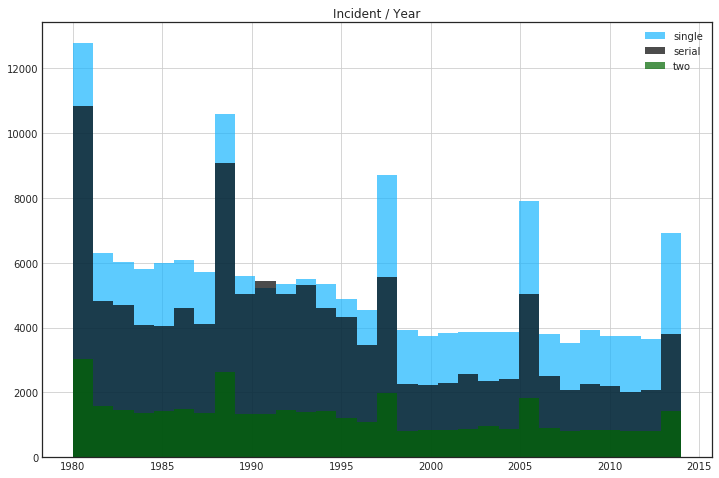

In [28]:
fig= plt.figure(figsize=(12,8))
plt.title("Incident / Year")
single_incident.hist(alpha = 0.7, bins = 30,label ='single')
mul_incident.hist(alpha = 0.7,bins=30,label='serial')
two_incident.hist(alpha = 0.7,bins=30,label='two')

plt.legend(loc = 'upper right')

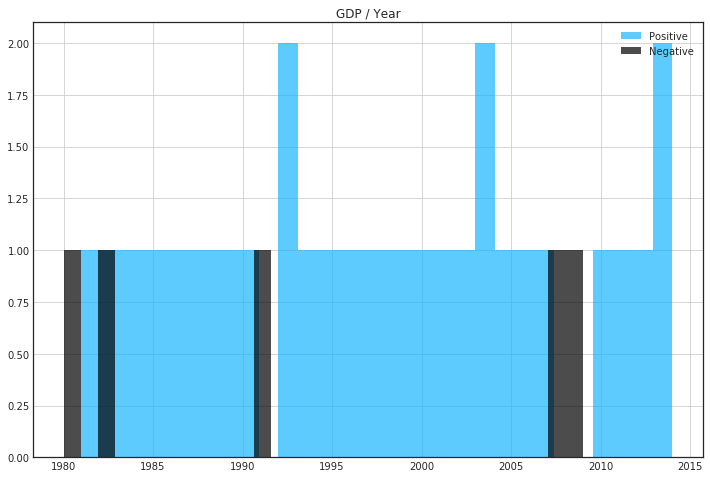

In [29]:
fig= plt.figure(figsize=(12,8))
plt.title("GDP / Year")
pos_gdp.hist(alpha = 0.7, bins = 30,label ='Positive')
neg_gdp.hist(alpha = 0.7,bins=30,label='Negative')

plt.legend(loc = 'upper right')

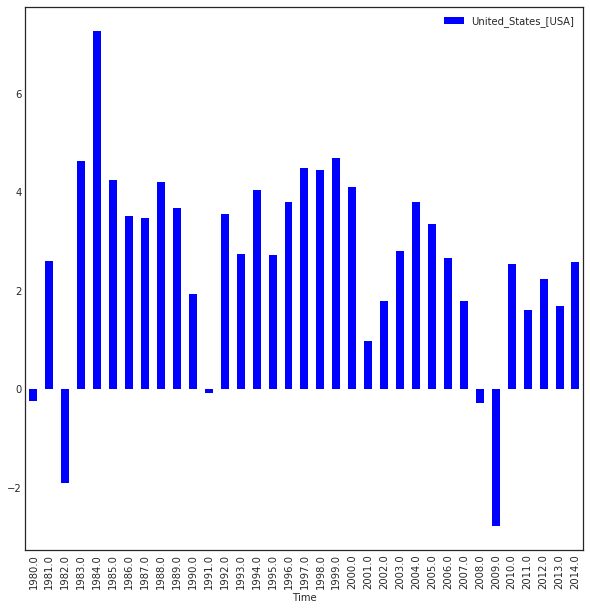

In [30]:
compare_attr = 'Time'
deco_pclass = deco[[compare_attr, 'United_States_[USA]']].groupby(compare_attr).mean()
deco_pclass.plot.bar(color="blue", figsize=(10,10))

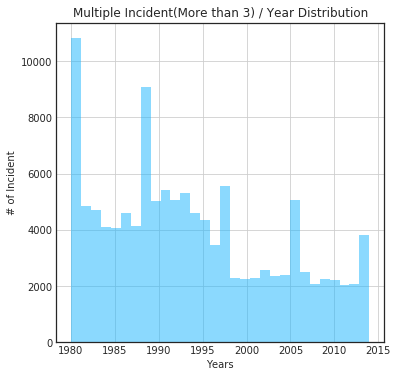

In [31]:
fig2 = plt.figure ( figsize=(20,20))
#Serial Incident
ax5 = fig2.add_subplot(333)
ax5.set_xlabel('Years')
ax5.set_ylabel('# of Incident')
ax5.set_title('Multiple Incident(More than 3) / Year Distribution')
mul_incident.hist(alpha=0.5,bins = 30)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


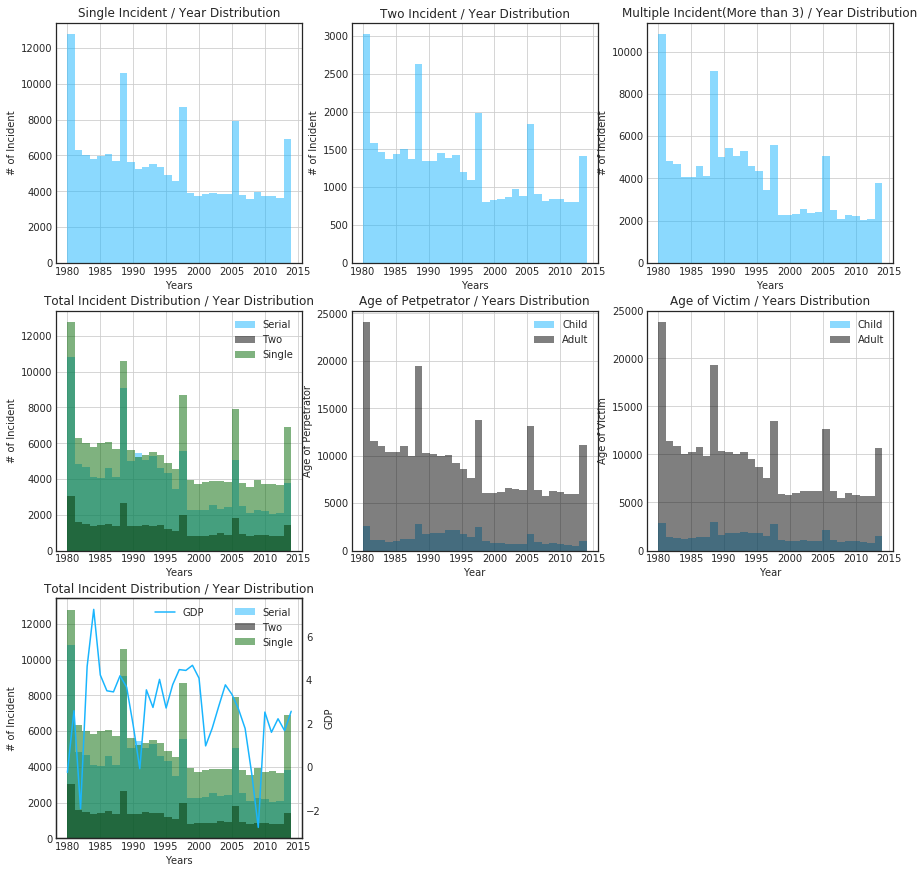

In [32]:
fig2 = plt.figure ( figsize=(15,15))
#Single Incident
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Years')
ax3.set_ylabel('# of Incident')
ax3.set_title('Single Incident / Year Distribution')
single_incident.hist(alpha=0.5,bins = 30)

#Two Incident
ax4 = fig2.add_subplot(332)
ax4.set_xlabel('Years')
ax4.set_ylabel('# of Incident')
ax4.set_title('Two Incident / Year Distribution')
two_incident.hist(alpha=0.5,bins = 30)

#Serial Incident
ax5 = fig2.add_subplot(333)
ax5.set_xlabel('Years')
ax5.set_ylabel('# of Incident')
ax5.set_title('Multiple Incident(More than 3) / Year Distribution')
mul_incident.hist(alpha=0.5,bins = 30)

#Incident Total
ax6 = fig2.add_subplot(334)
ax6.set_xlabel('Years')
ax6.set_ylabel('# of Incident')
ax6.set_title('Total Incident Distribution / Year Distribution')
mul_incident.hist(alpha=0.5,bins = 30, label="Serial")
ax7=fig2.add_subplot(334)
two_incident.hist(alpha=0.5,bins = 30, label="Two")
ax8=fig2.add_subplot(334)
single_incident.hist(alpha=0.5,bins = 30, label="Single")
ax6.legend(loc = 'upper right')

#Saldirgan
ax9 = fig2.add_subplot(335)
ax9.set_xlabel('Year')
ax9.set_ylabel('Age of Perpetrator')
ax9.set_title('Age of Petpetrator / Years Distribution')
cocuk_saldirgan.hist(alpha=0.5,bins = 30, label="Child")
ax10=fig2.add_subplot(335)
resit_saldirgan.hist(alpha=0.5,bins=30, label="Adult")
ax9.legend(loc = 'upper right')


#Maktul
ax11 = fig2.add_subplot(336)
ax11.set_xlabel('Year')
ax11.set_ylabel('Age of Victim')
ax11.set_title('Age of Victim / Years Distribution')
cocuk_kurban.hist(alpha=0.5,bins = 30, label="Child")
ax12=fig2.add_subplot(336)
resit_kurban.hist(alpha=0.5,bins=30, label="Adult")
ax11.legend(loc = 'upper right')


#Incident Total
ax13 = fig2.add_subplot(337)
ax13.set_xlabel('Years')
ax13.set_ylabel('# of Incident')
ax13.set_title('Total Incident Distribution / Year Distribution')
mul_incident.hist(alpha=0.5,bins = 30, label="Serial")
ax14=fig2.add_subplot(337)
two_incident.hist(alpha=0.5,bins = 30, label="Two")
ax15=fig2.add_subplot(337)
single_incident.hist(alpha=0.5,bins = 30, label="Single")

ax16=fig2.add_subplot(337)
ax16 = ax13.twinx()
ax16.plot(deco["Time"], deco["United_States_[USA]"], label="GDP")

ax16.set_ylabel('GDP')


ax16.legend(loc='upper center')

ax13.legend(loc = "upper right")


In [33]:
deco2 = deco

In [34]:
deco2.columns = ['Year', 'GDP']

In [35]:
merged = pd.merge(data, deco2, on='Year')

In [36]:

merged

,Record_ID,City,State,Year,Month,Incident,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Relationship,Weapon,Record_Source,GDP
0,1,Anchorage,Alaska,1980,January,1,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,FBI,-0.244596
1,2,Anchorage,Alaska,1980,March,1,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,FBI,-0.244596
2,4,Anchorage,Alaska,1980,April,1,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,FBI,-0.244596
3,6,Anchorage,Alaska,1980,May,1,Yes,Male,30,White,Male,36,White,Acquaintance,Rifle,FBI,-0.244596
4,7,Anchorage,Alaska,1980,May,2,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife,FBI,-0.244596
5,8,Anchorage,Alaska,1980,June,1,Yes,Female,99,White,Male,35,White,Wife,Knife,FBI,-0.244596
6,12,Anchorage,Alaska,1980,July,2,Yes,Male,20,White,Male,49,White,Stranger,Shotgun,FBI,-0.244596
7,13,Anchorage,Alaska,1980,July,3,Yes,Female,36,Black,Male,39,Black,Girlfriend,Blunt Object,FBI,-0.244596
8,16,Anchorage,Alaska,1980,August,3,Yes,Male,31,Black,Female,29,Black,Ex-Husband,Handgun,FBI,-0.244596
9,18,Juneau,Alaska,1980,November,1,Yes,Male,33,Native American/Alaska Native,Male,23,Native American/Alaska Native,Brother,Blunt Object,FBI,-0.244596


In [38]:
#The goal of the tree is to ultimately split observations into groups of homogenous target values
#(1 or 0), giving us a set of "paths" to follow to determine if this user liked or disliked a particular song

In [39]:
#Overfitting : a commomn difficulty for Decisiono Treeclassifiers
#Overfitting occurs when the alogirthm hypothesis too specifically about training data (assigning meaning to its noise), 
#thus reducing training error at the expense of increased error inthe data test set

In [40]:
from sklearn import preprocessing

In [41]:
le = preprocessing.LabelEncoder()
le.fit(merged["Weapon"])
list(le.classes_)

['Blunt Object',
 'Drowning',
 'Drugs',
 'Explosives',
 'Fall',
 'Fire',
 'Firearm',
 'Gun',
 'Handgun',
 'Knife',
 'Poison',
 'Rifle',
 'Shotgun',
 'Strangulation',
 'Suffocation']

In [42]:
le2 = preprocessing.LabelEncoder()
le2.fit(merged["City"])
list(le2.classes_)

['Abbeville',
 'Acadia',
 'Accomack',
 'Ada',
 'Adair',
 'Adams',
 'Addison',
 'Aiken',
 'Aitkin',
 'Alachua',
 'Alamance',
 'Alameda',
 'Alamosa',
 'Albany',
 'Albemarle',
 'Alcona',
 'Alcorn',
 'Aleutians West',
 'Alexander',
 'Alexandria',
 'Alfalfa',
 'Alger',
 'Allamakee',
 'Allegan',
 'Allegany',
 'Alleghany',
 'Allegheny',
 'Allen',
 'Allendale',
 'Alpena',
 'Alpine',
 'Amador',
 'Amelia',
 'Amherst',
 'Amite',
 'Anchorage',
 'Anderson',
 'Andrew',
 'Andrews',
 'Androscoggin',
 'Angelina',
 'Anne Arundel',
 'Anoka',
 'Anson',
 'Antrim',
 'Apache',
 'Appanoose',
 'Appling',
 'Appomattox',
 'Aransas',
 'Arapahoe',
 'Archer',
 'Archuleta',
 'Arenac',
 'Arkansas',
 'Arlington',
 'Armstrong',
 'Aroostook',
 'Ascension',
 'Ashe',
 'Ashland',
 'Ashley',
 'Ashtabula',
 'Asotin',
 'Assumption',
 'Atascosa',
 'Atchison',
 'Athens',
 'Atkinson',
 'Atlantic',
 'Atoka',
 'Attala',
 'Audrain',
 'Auglaize',
 'Augusta',
 'Austin',
 'Autauga',
 'Avery',
 'Avoyelles',
 'Baca',
 'Bacon',
 'Bailey'

In [43]:
le3 = preprocessing.LabelEncoder()
le3.fit(merged["State"])
list(le3.classes_)

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhodes Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [44]:
le4 = preprocessing.LabelEncoder()
le4.fit(merged["Month"])
list(le4.classes_)

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

In [45]:
le5 = preprocessing.LabelEncoder()
le5.fit(merged["Crime_Solved"])
list(le5.classes_)

['No', 'Yes']

In [46]:
le6 = preprocessing.LabelEncoder()
le6.fit(merged["Victim_Sex"])
list(le6.classes_)

['Female', 'Male']

In [47]:
le7 = preprocessing.LabelEncoder()
le7.fit(merged["Victim_Race"])
list(le7.classes_)

['Asian/Pacific Islander', 'Black', 'Native American/Alaska Native', 'White']

In [48]:
le8 = preprocessing.LabelEncoder()
le8.fit(merged["Perpetrator_Sex"])
list(le8.classes_)

['Female', 'Male']

In [49]:
le9 = preprocessing.LabelEncoder()
le9.fit(merged["Perpetrator_Race"])
list(le9.classes_)

['Asian/Pacific Islander', 'Black', 'Native American/Alaska Native', 'White']

In [50]:
le10 = preprocessing.LabelEncoder()
le10.fit(merged["Relationship"])
list(le10.classes_)

['Acquaintance',
 'Boyfriend',
 'Boyfriend/Girlfriend',
 'Brother',
 'Common-Law Husband',
 'Common-Law Wife',
 'Daughter',
 'Employee',
 'Employer',
 'Ex-Husband',
 'Ex-Wife',
 'Family',
 'Father',
 'Friend',
 'Girlfriend',
 'Husband',
 'In-Law',
 'Mother',
 'Neighbor',
 'Sister',
 'Son',
 'Stepdaughter',
 'Stepfather',
 'Stepmother',
 'Stepson',
 'Stranger',
 'Wife']

In [96]:
le11 = preprocessing.LabelEncoder()
le11.fit(merged["Year"])
list(le11.classes_)

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014]

In [334]:
features = ["Incident","City","State","Month","Crime_Solved","Year","Victim_Race","Perpetrator_Sex","Perpetrator_Race","Relationship","Perpetrator_Age","Victim_Age", "Weapon"]

In [335]:
train,test = train_test_split(merged, test_size = 0.15)
print("Training size: {}; Test Size: {}".format(len(train),len(test)))

Training size: 276282; Test Size: 48756


In [336]:
train["Weapon"]  = le.transform(train["Weapon"])
test["Weapon"]  = le.transform(test["Weapon"])
train["City"]  = le2.transform(train["City"])
test["City"]  = le2.transform(test["City"])
train["State"]  = le3.transform(train["State"])
test["State"]  = le3.transform(test["State"])
train["Month"]  = le4.transform(train["Month"])
test["Month"]  = le4.transform(test["Month"])
train["Crime_Solved"]  = le5.transform(train["Crime_Solved"])
test["Crime_Solved"]  = le5.transform(test["Crime_Solved"])
train["Victim_Sex"]  = le6.transform(train["Victim_Sex"])
test["Victim_Sex"]  = le6.transform(test["Victim_Sex"])
train["Victim_Race"]  = le7.transform(train["Victim_Race"])
test["Victim_Race"]  = le7.transform(test["Victim_Race"])
train["Perpetrator_Sex"]  = le8.transform(train["Perpetrator_Sex"])
test["Perpetrator_Sex"]  = le8.transform(test["Perpetrator_Sex"])
train["Perpetrator_Race"]  = le9.transform(train["Perpetrator_Race"])
test["Perpetrator_Race"]  = le9.transform(test["Perpetrator_Race"])
train["Relationship"]  = le10.transform(train["Relationship"])
test["Relationship"]  = le10.transform(test["Relationship"])
train["Year"]  = le11.transform(train["Year"])
test["Year"]  = le11.transform(test["Year"])

In [337]:
x_train = train[features]
y_train = train["Victim_Sex"]
x_test = test[features]
y_test = test["Victim_Sex"]

In [285]:
# Fit regression model
#regr_1 = DecisionTreeRegressor(max_depth=1)
#regr_2 = DecisionTreeRegressor()
#regr_1.fit(x_train, y_train)
#regr_2.fit(x_train, y_train)



In [286]:
# Predict
#y_1 = regr_1.predict(x_test)
#y_2 = regr_2.predict(x_test)



In [287]:
#y_2

In [288]:
#print("accuracy score: %.2f" % mean_squared_error(y_test, y_1))
#print("accuracy score: %.2f" % mean_squared_error(y_test, y_2))


In [289]:
#plt.figure(figsize=(8,6))
#plt.plot(x_test , y_2, color="cornflowerblue")


#plt.legend()
#plt.show()

In [338]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

In [339]:
C = DecisionTreeClassifier(min_samples_split=10000)

In [340]:
dt = C.fit(x_train,y_train)

In [341]:
y_pred = C.predict(x_test)
print("accuracy score: %.2f" % accuracy_score(y_test, y_pred))

accuracy score: 0.87


In [342]:
x_train.head()
y_train.head()
x_test.head()


,Incident,City,State,Month,Crime_Solved,Year,Victim_Race,Perpetrator_Sex,Perpetrator_Race,Relationship,Perpetrator_Age,Victim_Age,Weapon
227793,2,1433,42,1,1,20,1,1,1,0,21,18,8
29099,2,198,9,8,1,2,3,1,3,25,41,37,8
170307,1,1455,4,5,1,14,3,1,3,25,38,47,8
142667,15,693,43,7,1,11,3,1,3,7,31,59,0
53757,1,1392,4,1,1,4,3,1,3,26,71,75,8


In [343]:
def show_tree(tree,features,path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

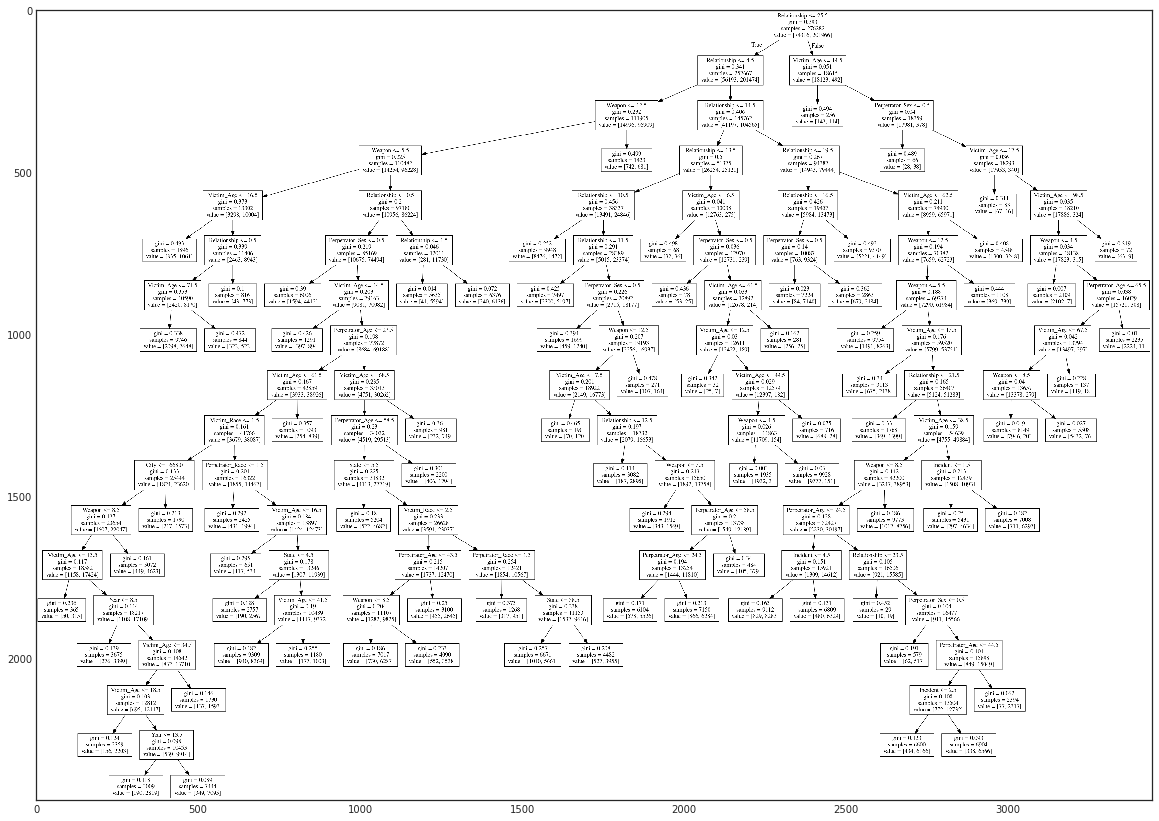

In [344]:
show_tree(dt,features,'dec_tree_01.png')

In [356]:
features = ["Incident","City","State","Month","Crime_Solved","Year","Victim_Race","Victim_Sex","Perpetrator_Race","Relationship","Perpetrator_Age","Victim_Age", "Weapon"]
train,test = train_test_split(merged, test_size = 0.15)
print("Training size: {}; Test Size: {}".format(len(train),len(test)))

Training size: 276282; Test Size: 48756


In [357]:
train["Weapon"]  = le.transform(train["Weapon"])
test["Weapon"]  = le.transform(test["Weapon"])
train["City"]  = le2.transform(train["City"])
test["City"]  = le2.transform(test["City"])
train["State"]  = le3.transform(train["State"])
test["State"]  = le3.transform(test["State"])
train["Month"]  = le4.transform(train["Month"])
test["Month"]  = le4.transform(test["Month"])
train["Crime_Solved"]  = le5.transform(train["Crime_Solved"])
test["Crime_Solved"]  = le5.transform(test["Crime_Solved"])
train["Victim_Sex"]  = le6.transform(train["Victim_Sex"])
test["Victim_Sex"]  = le6.transform(test["Victim_Sex"])
train["Victim_Race"]  = le7.transform(train["Victim_Race"])
test["Victim_Race"]  = le7.transform(test["Victim_Race"])
train["Perpetrator_Sex"]  = le8.transform(train["Perpetrator_Sex"])
test["Perpetrator_Sex"]  = le8.transform(test["Perpetrator_Sex"])
train["Perpetrator_Race"]  = le9.transform(train["Perpetrator_Race"])
test["Perpetrator_Race"]  = le9.transform(test["Perpetrator_Race"])
train["Relationship"]  = le10.transform(train["Relationship"])
test["Relationship"]  = le10.transform(test["Relationship"])
train["Year"]  = le11.transform(train["Year"])
test["Year"]  = le11.transform(test["Year"])

In [358]:
x_train = train[features]
y_train = train["Perpetrator_Sex"]
x_test = test[features]
y_test = test["Perpetrator_Sex"]
x_test
C = DecisionTreeClassifier(min_samples_split=10000)

In [359]:
dt = C.fit(x_train,y_train)
y_pred = C.predict(x_test)
print("accuracy score: %.2f" % accuracy_score(y_test, y_pred))

accuracy score: 0.93


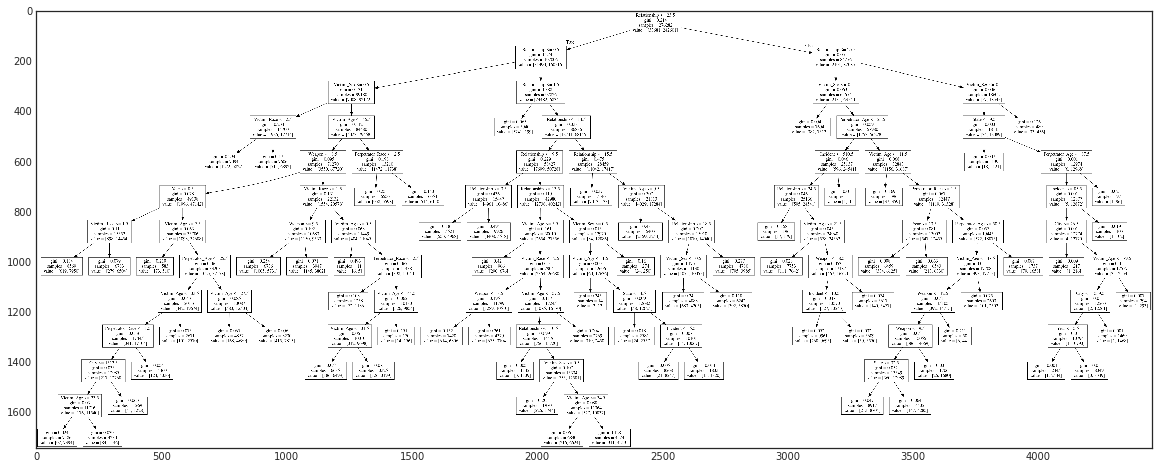

In [330]:
show_tree(dt,features,'dec_tree_02.png')

In [354]:
train["Weapon"]  = le.inverse_transform(train["Weapon"])
test["Weapon"]  = le.inverse_transform(test["Weapon"])

train["City"]  = le2.inverse_transform(train["City"])
test["City"]  = le2.inverse_transform(test["City"])

train["State"]  = le3.inverse_transform(train["State"])
test["State"]  = le3.inverse_transform(test["State"])

train["Month"]  = le4.inverse_transform(train["Month"])
test["Month"]  = le4.inverse_transform(test["Month"])

train["Crime_Solved"]  = le5.inverse_transform(train["Crime_Solved"])
test["Crime_Solved"]  = le5.inverse_transform(test["Crime_Solved"])

train["Victim_Sex"]  = le6.inverse_transform(train["Victim_Sex"])
test["Victim_Sex"]  = le6.inverse_transform(test["Victim_Sex"])

train["Victim_Race"]  = le7.inverse_transform(train["Victim_Race"])
test["Victim_Race"]  = le7.inverse_transform(test["Victim_Race"])

train["Perpetrator_Sex"]  = le8.inverse_transform(train["Perpetrator_Sex"])
test["Perpetrator_Sex"]  = le8.inverse_transform(test["Perpetrator_Sex"])

train["Perpetrator_Race"]  = le9.inverse_transform(train["Perpetrator_Race"])
test["Perpetrator_Race"]  = le9.inverse_transform(test["Perpetrator_Race"])

train["Relationship"]  = le10.inverse_transform(train["Relationship"])
test["Relationship"]  = le10.inverse_transform(test["Relationship"])

In [360]:
################## RANDOM FOREST Perpetrator ##################

In [382]:
features = ["Incident","City","State","Month","Crime_Solved","Year","Victim_Race","Victim_Sex","Perpetrator_Race","Relationship","Perpetrator_Age","Victim_Age", "Weapon"]
train,test = train_test_split(merged, test_size = 0.15)
print("Training size: {}; Test Size: {}".format(len(train),len(test)))

Training size: 276282; Test Size: 48756


In [383]:
train["Weapon"]  = le.transform(train["Weapon"])
test["Weapon"]  = le.transform(test["Weapon"])
train["City"]  = le2.transform(train["City"])
test["City"]  = le2.transform(test["City"])
train["State"]  = le3.transform(train["State"])
test["State"]  = le3.transform(test["State"])
train["Month"]  = le4.transform(train["Month"])
test["Month"]  = le4.transform(test["Month"])
train["Crime_Solved"]  = le5.transform(train["Crime_Solved"])
test["Crime_Solved"]  = le5.transform(test["Crime_Solved"])
train["Victim_Sex"]  = le6.transform(train["Victim_Sex"])
test["Victim_Sex"]  = le6.transform(test["Victim_Sex"])
train["Victim_Race"]  = le7.transform(train["Victim_Race"])
test["Victim_Race"]  = le7.transform(test["Victim_Race"])
train["Perpetrator_Sex"]  = le8.transform(train["Perpetrator_Sex"])
test["Perpetrator_Sex"]  = le8.transform(test["Perpetrator_Sex"])
train["Perpetrator_Race"]  = le9.transform(train["Perpetrator_Race"])
test["Perpetrator_Race"]  = le9.transform(test["Perpetrator_Race"])
train["Relationship"]  = le10.transform(train["Relationship"])
test["Relationship"]  = le10.transform(test["Relationship"])
train["Year"]  = le11.transform(train["Year"])
test["Year"]  = le11.transform(test["Year"])

In [384]:
x_train = train[features]
y_train = train["Perpetrator_Sex"]
x_test = test[features]
y_test = test["Perpetrator_Sex"]

In [385]:
from sklearn.ensemble import RandomForestClassifier

In [404]:
clf = RandomForestClassifier(max_depth=50, random_state=0)

In [405]:
clf = clf.fit(x_train,y_train)

In [406]:
y_pred = clf.predict(x_test)
print("accuracy score: %.2f" % accuracy_score(y_test, y_pred))

accuracy score: 0.93


In [368]:
#############################################################

In [ ]:
################ RANDOM FOREST Victim #######################

In [407]:
features = ["Incident","City","State","Month","Crime_Solved","Year","Victim_Race","Perpetrator_Sex","Perpetrator_Race","Relationship","Perpetrator_Age","Victim_Age", "Weapon"]
train,test = train_test_split(merged, test_size = 0.15)
print("Training size: {}; Test Size: {}".format(len(train),len(test)))

Training size: 276282; Test Size: 48756


In [408]:
train["Weapon"]  = le.transform(train["Weapon"])
test["Weapon"]  = le.transform(test["Weapon"])
train["City"]  = le2.transform(train["City"])
test["City"]  = le2.transform(test["City"])
train["State"]  = le3.transform(train["State"])
test["State"]  = le3.transform(test["State"])
train["Month"]  = le4.transform(train["Month"])
test["Month"]  = le4.transform(test["Month"])
train["Crime_Solved"]  = le5.transform(train["Crime_Solved"])
test["Crime_Solved"]  = le5.transform(test["Crime_Solved"])
train["Victim_Sex"]  = le6.transform(train["Victim_Sex"])
test["Victim_Sex"]  = le6.transform(test["Victim_Sex"])
train["Victim_Race"]  = le7.transform(train["Victim_Race"])
test["Victim_Race"]  = le7.transform(test["Victim_Race"])
train["Perpetrator_Sex"]  = le8.transform(train["Perpetrator_Sex"])
test["Perpetrator_Sex"]  = le8.transform(test["Perpetrator_Sex"])
train["Perpetrator_Race"]  = le9.transform(train["Perpetrator_Race"])
test["Perpetrator_Race"]  = le9.transform(test["Perpetrator_Race"])
train["Relationship"]  = le10.transform(train["Relationship"])
test["Relationship"]  = le10.transform(test["Relationship"])
train["Year"]  = le11.transform(train["Year"])
test["Year"]  = le11.transform(test["Year"])

In [409]:
x_train = train[features]
y_train = train["Victim_Sex"]
x_test = test[features]
y_test = test["Victim_Sex"]

In [421]:
clf = RandomForestClassifier(max_depth=50, random_state=0)
clf = clf.fit(x_train,y_train)

In [422]:
y_pred = clf.predict(x_test)
print("accuracy score: %.2f" % accuracy_score(y_test, y_pred))

accuracy score: 0.86


In [ ]:
show_tree(clf.estimators_[0],features,'rand_for_00.png')

In [428]:
#for iter,i in enumerate(clf.estimators_):
    #show_tree(i,features,'rand_fores_0{}.png'.format(iter))

KeyboardInterrupt: 